# Notebook 3. Estadística Inferencial

Elaboró: **Arellanos Balcázar Carlos Japhet**

16 de abril de 2025

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, t

# Estimadores y estimación puntual

En estadística inferencial, un **estimador** es una regla o función que se aplica a una muestra aleatoria para aproximar el valor de un parámetro poblacional desconocido. Formalmente, un estimador es una **estadística**, es decir, una variable aleatoria definida como función de los datos observados.

## Definición

Un estimador puntual para un parámetro $\theta$ es una estadística $\hat{\theta}$ que se propone para estimar el valor de $\theta$.

- Cuando se evalúa el estimador con los valores observados de una muestra, se obtiene una **estimación puntual** (un número).
- El estimador, como función de la muestra, tiene una distribución de probabilidad asociada (distribución muestral del estimador).

## Propiedades deseables de los estimadores

1. **Insesgamiento**: Un estimador $\hat{\theta}$ es insesgado si su esperanza es igual al parámetro:

   $$
   \mathbb{E}[\hat{\theta}] = \theta
   $$

2. **Consistencia**: Un estimador es consistente si, al aumentar el tamaño de muestra $n$, su valor se aproxima en probabilidad al parámetro:

   $$
   \hat{\theta}_n \overset{P}{\longrightarrow} \theta
   $$

3. **Eficiencia**: Un estimador es más eficiente que otro si tiene **menor varianza**, es decir, proporciona estimaciones más precisas.

## Ejemplos comunes de estimadores

| Parámetro poblacional | Estimador puntual           |
|-----------------------|-----------------------------|
| Media $\mu$           | $\bar{X} = \frac{1}{n} \sum X_i$ |
| Proporción $p$        | $\hat{p} = \frac{X}{n}$     |
| Varianza $\sigma^2$   | $S^2 = \frac{1}{n-1} \sum (X_i - \bar{X})^2$ |

- La media muestral $\bar{X}$ es un estimador **insesgado** para la media poblacional en cualquier distribución con esperanza finita.
- La varianza muestral $S^2$ también es un estimador insesgado de la varianza poblacional, y el divisor $n - 1$ se justifica precisamente por esta propiedad

## Ejemplo: estimadores puntuales desde datos simulados

A continuación se simula una muestra aleatoria y se calculan tres estimadores puntuales comunes:

- La **media muestral** como estimador de la media poblacional $\mu$.
- La **varianza muestral insesgada** como estimador de $\sigma^2$.
- La **proporción muestral** como estimador de $p$ en una variable dicotómica (Bernoulli).

Se utilizan dos conjuntos de datos simulados:
- Una muestra de 50 observaciones de una distribución normal $N(10, 3^2)$.
- Una muestra de 50 ensayos de una variable Bernoulli con parámetro $p = 0.4$.

In [2]:
# Simulación de una muestra aleatoria de tamaño n
np.random.seed(42)
n = 50
p_real = 0.4
mu_real = 10
sigma_real = 3

# Muestras
muestra_proporcion = np.random.binomial(n=1, p=p_real, size=n)
muestra_normal = np.random.normal(loc=mu_real, scale=sigma_real, size=n)

# Cálculo manual de la media
media_manual = sum(muestra_normal) / n

# Cálculo manual de la varianza insesgada
varianza_manual = sum((xi - media_manual)**2 for xi in muestra_normal) / (n - 1)

# Cálculo manual de la proporción muestral
proporcion_manual = sum(muestra_proporcion) / n

# Resultados
print(f"Media muestral (manual): {media_manual:.4f}")
print(f"Varianza insesgada (manual): {varianza_manual:.4f}")
print(f"Proporción muestral (manual): {proporcion_manual:.4f}")


Media muestral (manual): 9.9912
Varianza insesgada (manual): 7.5963
Proporción muestral (manual): 0.3200


# Intervalos de confianza

En estadística inferencial, un **intervalo de confianza** es un rango de valores, calculado a partir de una muestra, que se utiliza para estimar un parámetro poblacional desconocido. Fue introducido formalmente por Jerzy Neyman en 1937 como una forma de cuantificar la incertidumbre asociada a una estimación.

## Definición

Sea $\theta$ un parámetro desconocido y $(\hat{\theta}_1, \hat{\theta}_2)$ un par de estadísticos tales que:

$$
P(\hat{\theta}_1 < \theta < \hat{\theta}_2) = 1 - \alpha
$$

Entonces, el intervalo $(\hat{\theta}_1, \hat{\theta}_2)$ es un **intervalo de confianza para $\theta$ con nivel de confianza $1 - \alpha$**.

El valor $1 - \alpha$ representa la **proporción de intervalos que, en el largo plazo**, contendrán el valor verdadero del parámetro cuando se repite el experimento de muestreo muchas veces. Este valor suele ser 0.95 o 0.99 en la práctica.

## Interpretación frecuentista

Bajo la interpretación frecuentista, **el parámetro es fijo y desconocido**, y el intervalo de confianza es una variable aleatoria. No decimos que "la probabilidad de que $\theta$ esté en el intervalo es 95%", sino que "el 95% de los intervalos construidos con este procedimiento incluirán a $\theta$".

## Componentes de un intervalo de confianza

Un intervalo de confianza estándar se construye mediante:

- Un **estimador puntual** $\hat{\theta}$,
- Un **valor crítico** $z_{\alpha/2}$ o $t_{\alpha/2}$, según el caso,
- El **error estándar** del estimador $\text{EE}(\hat{\theta})$.

La fórmula general es:

$$
\hat{\theta} \pm (\text{cuantil}) \cdot \text{EE}(\hat{\theta})
$$

Este intervalo se interpreta como un rango plausible para el parámetro $\theta$ con un grado de confianza $1 - \alpha$.

## Intervalo de confianza para la media (varianza conocida)

Cuando se conoce la **varianza poblacional** $\sigma^2$ y la población sigue una distribución normal (o si la muestra es suficientemente grande), puede construirse un intervalo de confianza para la **media poblacional** $\mu$ utilizando la distribución normal estándar $Z$.

### Supuestos

- La muestra es aleatoria.
- La población es normal **o** $n \geq 30$.
- La varianza $\sigma^2$ es conocida.

### Estadístico pivotal

La media muestral $\bar{X}$ tiene distribución normal:

$$
\bar{X} \sim N\left(\mu, \frac{\sigma^2}{n}\right)
$$

Por lo tanto, el estadístico estandarizado:

$$
Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim N(0, 1)
$$

se utiliza para construir el intervalo.

### Intervalo de confianza

Un intervalo de confianza de nivel $1 - \alpha$ para la media poblacional $\mu$ es:

$$
\bar{X} \pm z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

donde $z_{\alpha/2}$ es el valor crítico de la normal estándar que deja un área de $\alpha/2$ en cada cola.

### Observaciones

- La **longitud del intervalo** depende de $z_{\alpha/2}$, $\sigma$ y el tamaño muestral $n$.
- A mayor $n$, **más preciso** es el intervalo.
- A mayor nivel de confianza $(1 - \alpha)$, el **intervalo es más ancho**.

### Ejemplo: intervalo de confianza para la media con varianza conocida

Se simula una muestra aleatoria de tamaño $n = 50$ proveniente de una población normal con media $\mu = 3$ y desviación estándar **conocida** $\sigma = 0.4$.

El objetivo es construir un intervalo de confianza del 90% para la media poblacional $\mu$ usando la fórmula:

$$
\bar{X} \pm z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

donde $z_{\alpha/2} \approx 1.645$ es el cuantil de la distribución normal estándar para $\alpha = 0.10$.

Media muestral: 2.9898
Intervalo de confianza al 90%: (2.8967, 3.0828)


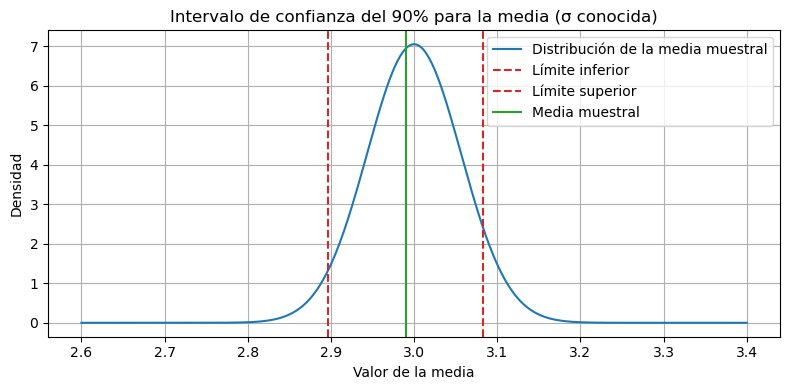

In [3]:
# Parámetros poblacionales
mu_real = 3
sigma_real = 0.4  # desviación estándar conocida
n = 50  # tamaño muestral
alpha = 0.1
confianza = 1 - alpha

# Simulación de la muestra
np.random.seed(1)
muestra = np.random.normal(loc=mu_real, scale=sigma_real, size=n)

# Estadísticos muestrales
media_muestral = np.mean(muestra)
z = norm.ppf(1 - alpha / 2)
margen_error = z * sigma_real / np.sqrt(n)

# Intervalo de confianza
lim_inf = media_muestral - margen_error
lim_sup = media_muestral + margen_error

# Resultados
print(f"Media muestral: {media_muestral:.4f}")
print(f"Intervalo de confianza al {int(confianza*100)}%: ({lim_inf:.4f}, {lim_sup:.4f})")

# Visualización
x_vals = np.linspace(mu_real - sigma_real, mu_real + sigma_real, 500)
pdf = norm.pdf(x_vals, loc=mu_real, scale=sigma_real / np.sqrt(n))

plt.figure(figsize=(8, 4))
plt.plot(x_vals, pdf, label='Distribución de la media muestral')
plt.axvline(lim_inf, color='tab:red', linestyle='--', label='Límite inferior')
plt.axvline(lim_sup, color='tab:red', linestyle='--', label='Límite superior')
plt.axvline(media_muestral, color='tab:green', linestyle='-', label='Media muestral')
plt.title(f'Intervalo de confianza del {int(confianza*100)}% para la media (σ conocida)')
plt.xlabel('Valor de la media')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Intervalo de confianza para la media (varianza desconocida)

Cuando la media poblacional $\mu$ es desconocida y la **varianza $\sigma^2$ también es desconocida**, se utiliza una estimación muestral de la desviación estándar, y en lugar de la distribución normal se emplea la **distribución t de Student**.

### Supuestos:

- La población es **normal**, o el tamaño muestral es moderadamente grande.
- Se tiene una muestra aleatoria de tamaño $n$.
- Se desconoce la varianza poblacional $\sigma^2$.

### Forma del intervalo:

El intervalo de confianza para $\mu$ con nivel $1 - \alpha$ se construye como:

$$
\bar{X} \pm t_{\alpha/2,\, n - 1} \cdot \frac{S}{\sqrt{n}}
$$

donde:

- $\bar{X}$ es la media muestral,
- $S$ es la desviación estándar muestral,
- $t_{\alpha/2,\, n - 1}$ es el cuantil de la distribución t con $n - 1$ grados de libertad,
- $n$ es el tamaño de muestra.

### Justificación teórica:

Dado que:

$$
\frac{\bar{X} - \mu}{S / \sqrt{n}} \sim t_{n - 1},
$$

esta cantidad **pivotal** permite construir el intervalo deseado sin conocer la varianza poblacional.

### Observaciones:

- El uso de la distribución t **ensancha** el intervalo en comparación con la normal estándar, especialmente en muestras pequeñas.
- Conforme aumenta $n$, la distribución t se aproxima a la normal.

### Ejemplo: intervalo de confianza para la media con varianza desconocida

Se simula una muestra aleatoria de tamaño $n = 25$ proveniente de una población normal con media $\mu = 3$ y **varianza desconocida**.  
Se calcula la media y la desviación estándar muestral, y se construye un intervalo de confianza del 90% usando la distribución t de Student:

$$
\bar{X} \pm t_{\alpha/2,\, n - 1} \cdot \frac{S}{\sqrt{n}}
$$

donde:
- $\bar{X}$ es la media muestral,
- $S$ es la desviación estándar muestral,
- $t_{\alpha/2,\, n-1}$ es el cuantil t para 24 grados de libertad.

Media muestral: 2.8993
Desviación estándar muestral: 0.4072
Intervalo de confianza al 90%: (2.7600, 3.0387)


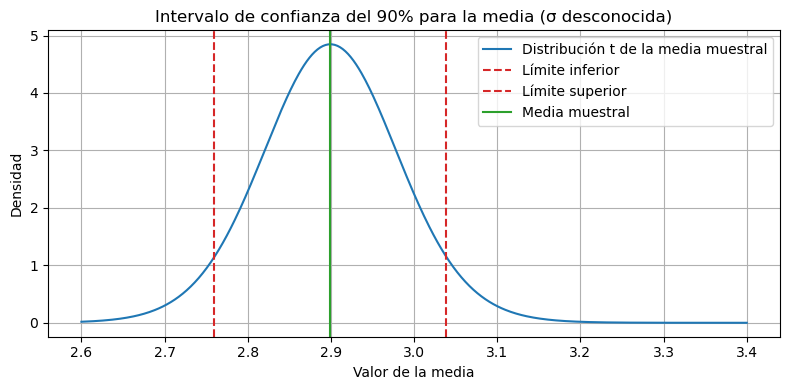

In [4]:
# Parámetros poblacionales para simulación
mu_real = 3
sigma_real = 0.4  # ahora será desconocida
n = 25
alpha = 0.10
confianza = 1 - alpha

# Simulación de la muestra
np.random.seed(2)
muestra = np.random.normal(loc=mu_real, scale=sigma_real, size=n)

# Estadísticos muestrales
media_muestral = np.mean(muestra)
s_muestral = np.std(muestra, ddof=1)  # desviación estándar muestral
t_critico = t.ppf(1 - alpha / 2, df=n - 1)
margen_error = t_critico * s_muestral / np.sqrt(n)

# Intervalo de confianza
lim_inf = media_muestral - margen_error
lim_sup = media_muestral + margen_error

# Resultados
print(f"Media muestral: {media_muestral:.4f}")
print(f"Desviación estándar muestral: {s_muestral:.4f}")
print(f"Intervalo de confianza al {int(confianza*100)}%: ({lim_inf:.4f}, {lim_sup:.4f})")

# Visualización
x_vals = np.linspace(mu_real - sigma_real, mu_real + sigma_real, 500)
pdf_t = t.pdf(x_vals, df=n-1, loc=media_muestral, scale=s_muestral/np.sqrt(n))

plt.figure(figsize=(8, 4))
plt.plot(x_vals, pdf_t, label='Distribución t de la media muestral')
plt.axvline(lim_inf, color='tab:red', linestyle='--', label='Límite inferior')
plt.axvline(lim_sup, color='tab:red', linestyle='--', label='Límite superior')
plt.axvline(media_muestral, color='tab:green', linestyle='-', label='Media muestral')
plt.title(f'Intervalo de confianza del {int(confianza*100)}% para la media (σ desconocida)')
plt.xlabel('Valor de la media')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Intervalo de confianza para una proporción

Cuando se desea estimar una proporción poblacional $p$ a partir de una muestra aleatoria de tamaño $n$, se utiliza la proporción muestral:

$$
\hat{p} = \frac{x}{n}
$$

donde $x$ es el número de éxitos observados. Esta proporción muestral es un estimador insesgado de $p$ y, bajo ciertas condiciones, su distribución se puede aproximar por una distribución normal.

### Condiciones para usar la aproximación normal

La aproximación normal a la distribución binomial es válida cuando:

- $np \geq 5$ y $n(1 - p) \geq 5$ (criterio clásico),  
- o bien cuando $p \pm 3 \sqrt{pq/n}$ se encuentra dentro del intervalo $(0, 1)$.

En la práctica, como $p$ es desconocido, se sustituye por $\hat{p}$ para verificar la condición.

### Forma del intervalo de confianza

Dado un nivel de confianza $1 - \alpha$, el intervalo se calcula como:

$$
\hat{p} \pm z_{\alpha/2} \cdot \sqrt{ \frac{\hat{p}(1 - \hat{p})}{n} }
$$

donde:
- $\hat{p}$ es la proporción muestral,
- $z_{\alpha/2}$ es el cuantil de la normal estándar.

### Interpretación

El intervalo contiene al verdadero valor de la proporción poblacional $p$ en aproximadamente el $1 - \alpha$ de los casos en los que se repita el experimento bajo las mismas condiciones.  
Este método es ampliamente utilizado para estimaciones en encuestas, estudios de prevalencia y proporciones de respuesta.

### Ejemplo: intervalo de confianza para una proporción

Se simula una muestra aleatoria de tamaño $n = 100$ de una variable dicotómica (Bernoulli) con proporción poblacional real $p = 0.4$. A partir de la muestra, se estima:

- La **proporción muestral**: $\hat{p} = x / n$
- El **intervalo de confianza del 90%** para $p$ usando:

$$
\hat{p} \pm z_{\alpha/2} \cdot \sqrt{ \frac{\hat{p}(1 - \hat{p})}{n} }
$$

Proporción muestral: 0.3400
Intervalo de confianza al 90%: (0.2621, 0.4179)


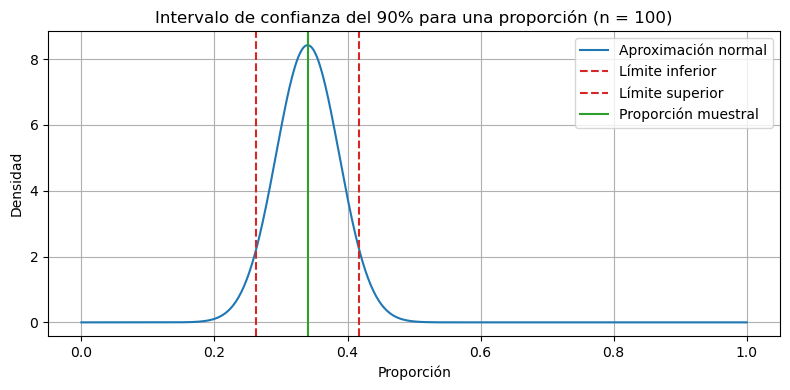

In [5]:
# Parámetros reales
p_real = 0.4
n = 100  # tamaño de muestra
alpha = 0.10
confianza = 1 - alpha

# Simulación de muestra binomial (éxito/fracaso)
np.random.seed(3)
muestra_binaria = np.random.binomial(n=1, p=p_real, size=n)
x = np.sum(muestra_binaria)
p_muestral = x / n

# Estadístico y margen de error
z = norm.ppf(1 - alpha / 2)
margen_error = z * np.sqrt(p_muestral * (1 - p_muestral) / n)

# Intervalo de confianza
lim_inf = p_muestral - margen_error
lim_sup = p_muestral + margen_error

# Resultados
print(f"Proporción muestral: {p_muestral:.4f}")
print(f"Intervalo de confianza al {int(confianza*100)}%: ({lim_inf:.4f}, {lim_sup:.4f})")

# Visualización
x_vals = np.linspace(0, 1, 500)
pdf_normal = norm.pdf(x_vals, loc=p_muestral, scale=np.sqrt(p_muestral * (1 - p_muestral) / n))

plt.figure(figsize=(8, 4))
plt.plot(x_vals, pdf_normal, label='Aproximación normal')
plt.axvline(lim_inf, color='tab:red', linestyle='--', label='Límite inferior')
plt.axvline(lim_sup, color='tab:red', linestyle='--', label='Límite superior')
plt.axvline(p_muestral, color='tab:green', linestyle='-', label='Proporción muestral')
plt.title(f'Intervalo de confianza del {int(confianza*100)}% para una proporción (n = {n})')
plt.xlabel('Proporción')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Pruebas de hipótesis

Una **prueba de hipótesis estadística** es un procedimiento que permite tomar una decisión, basada en datos muestrales, sobre la validez de una afirmación respecto a un parámetro poblacional.

## Elementos fundamentales de una prueba

1. **Hipótesis nula ($H_0$)**: Es la afirmación que se somete a prueba. Se considera cierta salvo que haya evidencia suficiente en su contra.
2. **Hipótesis alternativa ($H_1$ o $H_a$)**: Es la afirmación que se acepta si los datos proporcionan evidencia suficiente para rechazar $H_0$.
3. **Estadístico de prueba**: Es una función de los datos muestrales que se utiliza para decidir entre $H_0$ y $H_a$.
4. **Regla de decisión**: Se define una **región de rechazo** en función de un nivel de significancia $\alpha$. Si el estadístico cae dentro de esta región, se **rechaza** $H_0$.

## Tipos de errores

- **Error tipo I**: Rechazar $H_0$ cuando en realidad es verdadera. Su probabilidad es $\alpha$, el **nivel de significancia** de la prueba.
- **Error tipo II**: No rechazar $H_0$ cuando en realidad es falsa. Su probabilidad se denota por $\beta$.

## Estrategias de decisión

Existen dos enfoques principales:

- **Regla basada en el valor crítico**: Se calcula un estadístico (como $Z$ o $t$), y se compara con un valor umbral.
- **Valor p**: Es la probabilidad de obtener un estadístico de prueba tan extremo como el observado, bajo la suposición de que $H_0$ es cierta. Si el valor p es menor que $\alpha$, se rechaza $H_0$.

## Ejemplo clásico

Supongamos que se quiere probar:

$$
H_0: \mu = \mu_0 \quad \text{vs} \quad H_a: \mu \neq \mu_0
$$

Para una muestra de tamaño $n$ y varianza conocida, el estadístico es:

$$
Z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}
$$

La decisión se toma comparando el valor de $Z$ con los cuantiles de la normal estándar.

## Ejemplo: prueba de hipótesis para la media (varianza conocida)

Se realiza una prueba bilateral para contrastar si la media poblacional es igual a un valor específico, bajo el supuesto de que la **varianza poblacional es conocida**:

$$
H_0: \mu = \mu_0 \quad \text{vs} \quad H_a: \mu \neq \mu_0
$$

Usamos el estadístico:

$$
Z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}} \sim N(0, 1)
$$

y se comparan los resultados con el **valor crítico** $z_{\alpha/2}$ y el **valor p**. Se simula una muestra de tamaño $n = 40$ a partir de una población con media real igual a $\mu_0 = 10$ y desviación estándar conocida $\sigma = 2$.

Media muestral: 10.0952
Estadístico Z: 0.3010
Valor crítico (±zα/2): ±1.9600
Valor p: 0.7634
¿Rechazar H₀? No


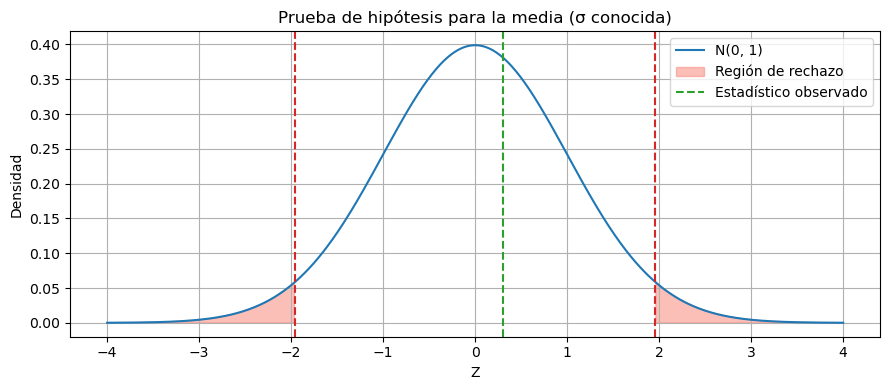

In [6]:
# Parámetros poblacionales
mu_0 = 10       # valor hipotético de la media
sigma = 2       # desviación estándar conocida
n = 40          # tamaño muestral
alpha = 0.05    # nivel de significancia

# Simulación de la muestra
np.random.seed(4)
muestra = np.random.normal(loc=mu_0, scale=sigma, size=n)
media_muestral = np.mean(muestra)

# Estadístico de prueba
z = (media_muestral - mu_0) / (sigma / np.sqrt(n))
z_critico = norm.ppf(1 - alpha / 2)

# Valor p
valor_p = 2 * (1 - norm.cdf(abs(z)))

# Decisión
rechazar = abs(z) > z_critico

# Resultados
print(f"Media muestral: {media_muestral:.4f}")
print(f"Estadístico Z: {z:.4f}")
print(f"Valor crítico (±zα/2): ±{z_critico:.4f}")
print(f"Valor p: {valor_p:.4f}")
print(f"¿Rechazar H₀? {'Sí' if rechazar else 'No'}")

# Visualización
x_vals = np.linspace(-4, 4, 500)
pdf = norm.pdf(x_vals)

plt.figure(figsize=(9, 4))
plt.plot(x_vals, pdf, label='N(0, 1)')
plt.fill_between(x_vals, 0, pdf, where=np.abs(x_vals) > z_critico, color='salmon', alpha=0.5, label='Región de rechazo')
plt.axvline(z, color='tab:green', linestyle='--', label='Estadístico observado')
plt.axvline(-z_critico, color='tab:red', linestyle='--')
plt.axvline(z_critico, color='tab:red', linestyle='--')
plt.title('Prueba de hipótesis para la media (σ conocida)')
plt.xlabel('Z')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()